In [7]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# FPGheArt - Week 2 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653




# Functions

In [8]:
def plot_res(fit1, label_fit1 = '', fit_compare = None, label_fit_compare = '',  compare = False ):
    '''
    Simple function to plot the history of train and validation accuracy
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))


    # summarize history for loss
    ax1.plot(fit1.history['loss'], label = (label_fit1 + " Train Loss"), color = '#648FFF', lw = 2.5)
    ax1.plot(fit1.history['val_loss'], label = (label_fit1 + " Validation Loss"), color = '#FE6100', lw = 2.5)
    
    if compare: ax1.plot(fit_compare.history['val_loss'], label = label_fit_compare+ ' Validation Loss', color  = '#DC267F', lw = 2.5)


    ax1.legend(loc = 'best')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Model Loss')
    ax1.grid(ls = '--')

    # summarize history for accuracy
    ax2.plot(fit1.history['accuracy'], label = (label_fit1 + ' Train Accuracy'), color =  '#648FFF', lw = 2.5)
    ax2.plot(fit1.history['val_accuracy'], label = (label_fit1 + ' Validation Accuracy'), color = '#FE6100', lw = 2.5)
    if compare: ax2.plot(fit_compare.history['val_accuracy'], label = label_fit_compare+ ' Validation Accuracy', color  = '#DC267F', lw = 2.5)

    ax2.legend(loc = 'best')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Model Accuracy')
    ax2.grid(ls = '--')

    plt.show()
    return

In [9]:
def create_CNN(reg = regularizers.l2, PoolType = keras.layers.MaxPooling1D, PoolSize = 3, 
               learn_rate= 0.001, fil = [4], k_size = [10],
               dout_rate = 0.2, dense = [10]):
    np.random.seed(12345)

    ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

    model = Sequential()
    model.add(Conv1D(filters = fil[0], kernel_size = k_size[0],
                        kernel_regularizer = reg(learn_rate),
                        kernel_initializer=ini,
                        activation = "relu",
                        input_shape = input_shape
                        ))
    model.add(PoolType(PoolSize))

    for i in range(1,len(fil)):
        model.add(Conv1D(filters = fil[i], kernel_size = k_size[i],
                        activation = "relu",
                        ))
        model.add(PoolType(PoolSize))
        
    model.add(Flatten())
    for i in range(len(dense)):
        model.add(Dense(dense[i],activation="relu"))
        
    model.add(Dropout(dout_rate))
    model.add(Dense(N_categ, activation="sigmoid"))
    
    return model

In [10]:
def compile_model(reg = regularizers.l2, PoolType = keras.layers.MaxPooling1D, PoolSize = 3, 
               learn_rate= 0.001, fil = [4], k_size = [10],
               dout_rate = 0.2, dense = [10]):
    # create the mode
    model=create_CNN(reg,PoolType, PoolSize, learn_rate, fil, k_size, dout_rate, dense)
    # compile the model
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

    return model


# CNN - 1

## Data 

10000


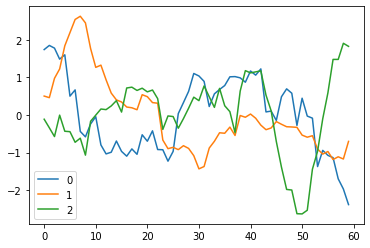

In [13]:
str0 = "ts_L60_Z12_A500.0_DX50_bias5_N10000"

fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x = np.asarray(pd.read_csv(fnamex, header = None))

N = len(x)
print(N)

scaler = StandardScaler()
x_std =  scaler.fit_transform(x.T).T

plt.plot(x_std[0], label = '0')
plt.plot(x_std[1], label = '1')
plt.plot(x_std[2], label = '2')
plt.legend()
plt.show() 

In [14]:
categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
y = to_categorical(categ)

In [15]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3

## Data splitting


In [16]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

# CNN definition


In [17]:
np.random.seed(12345)
model = compile_model( fil = [5,5], k_size = [11,7], PoolSize = 2, dense = [10], learn_rate = 0.001)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 5)             180       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 5)              0         
_________________________________________________________________
flatten (Flatten)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                460       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0

In [18]:
hist = model.fit(x_train, y_train, batch_size = 250, epochs = 250, 
                 validation_data = (x_train, y_train), 
                verbose = 2, shuffle = True)

Epoch 1/250
32/32 - 1s - loss: 11158.9082 - accuracy: 0.3291 - val_loss: 548.3271 - val_accuracy: 0.3327
Epoch 2/250
32/32 - 0s - loss: 520.7242 - accuracy: 0.3388 - val_loss: 1.1329 - val_accuracy: 0.3359
Epoch 3/250
32/32 - 0s - loss: 1.2055 - accuracy: 0.3351 - val_loss: 1.1242 - val_accuracy: 0.3365
Epoch 4/250
32/32 - 0s - loss: 1.1216 - accuracy: 0.3368 - val_loss: 1.1202 - val_accuracy: 0.3376
Epoch 5/250
32/32 - 0s - loss: 1.1218 - accuracy: 0.3375 - val_loss: 1.1191 - val_accuracy: 0.3372
Epoch 6/250
32/32 - 0s - loss: 1.1181 - accuracy: 0.3374 - val_loss: 1.1180 - val_accuracy: 0.3370
Epoch 7/250
32/32 - 0s - loss: 1.1189 - accuracy: 0.3365 - val_loss: 1.1172 - val_accuracy: 0.3369
Epoch 8/250
32/32 - 0s - loss: 1.1223 - accuracy: 0.3366 - val_loss: 1.1162 - val_accuracy: 0.3370
Epoch 9/250
32/32 - 0s - loss: 1.1200 - accuracy: 0.3372 - val_loss: 1.1157 - val_accuracy: 0.3369
Epoch 10/250
32/32 - 0s - loss: 1.1180 - accuracy: 0.3369 - val_loss: 1.1140 - val_accuracy: 0.3371
E

Epoch 83/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 84/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3376 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 85/250
32/32 - 0s - loss: 1.0986 - accuracy: 0.3375 - val_loss: 1.0984 - val_accuracy: 0.3377
Epoch 86/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3377 - val_loss: 1.0983 - val_accuracy: 0.3377
Epoch 87/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3377 - val_loss: 1.0983 - val_accuracy: 0.3376
Epoch 88/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3376 - val_loss: 1.0984 - val_accuracy: 0.3377
Epoch 89/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3377 - val_loss: 1.0983 - val_accuracy: 0.3377
Epoch 90/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 91/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3376 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 92/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3376 - val_loss: 1.0981 - val_accuracy: 0.3376


Epoch 165/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 166/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3376 - val_loss: 1.0983 - val_accuracy: 0.3377
Epoch 167/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 168/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3376 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 169/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 170/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 171/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 172/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 173/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3377 - val_loss: 1.0982 - val_accuracy: 0.3377
Epoch 174/250
32/32 - 0s - loss: 1.0986 - accuracy: 0.3374 - val_loss: 1.0982 - val_accurac

32/32 - 0s - loss: 1.0982 - accuracy: 0.3376 - val_loss: 1.0981 - val_accuracy: 0.3377
Epoch 247/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3376 - val_loss: 1.0981 - val_accuracy: 0.3376
Epoch 248/250
32/32 - 0s - loss: 1.0982 - accuracy: 0.3376 - val_loss: 1.0981 - val_accuracy: 0.3376
Epoch 249/250
32/32 - 1s - loss: 1.0982 - accuracy: 0.3375 - val_loss: 1.0981 - val_accuracy: 0.3376
Epoch 250/250
32/32 - 0s - loss: 1.0981 - accuracy: 0.3377 - val_loss: 1.0981 - val_accuracy: 0.3377


In [19]:
print(f"Validation loss  is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation loss  is 0.32


Not Working!
The NN has as input larger and larger numbers. We shall manipulate the data at the beginning for example reshuffling them as they have average 0 and remove their standard deviation (set it to 1)


In [22]:
x_train, x_test, y_train, y_test = train_test_split( x_std, y, test_size=0.2)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

In [13]:
model = compile_model( fil = [5,5], k_size = [11,7], PoolSize = 2, dense = [10], learn_rate = 0.001)

hist = model.fit(x_train, y_train, batch_size = 250, epochs = 250, 
                 validation_data = (x_train, y_train), 
                verbose = 2, shuffle = True)

Epoch 1/250
32/32 - 1s - loss: 1.0923 - accuracy: 0.3664 - val_loss: 1.0867 - val_accuracy: 0.3885
Epoch 2/250
32/32 - 0s - loss: 1.0803 - accuracy: 0.3966 - val_loss: 1.0693 - val_accuracy: 0.4232
Epoch 3/250
32/32 - 0s - loss: 1.0595 - accuracy: 0.4250 - val_loss: 1.0412 - val_accuracy: 0.4611
Epoch 4/250
32/32 - 0s - loss: 1.0321 - accuracy: 0.4516 - val_loss: 1.0071 - val_accuracy: 0.4656
Epoch 5/250
32/32 - 0s - loss: 1.0002 - accuracy: 0.4812 - val_loss: 0.9745 - val_accuracy: 0.5076
Epoch 6/250
32/32 - 0s - loss: 0.9751 - accuracy: 0.5077 - val_loss: 0.9408 - val_accuracy: 0.5446
Epoch 7/250
32/32 - 0s - loss: 0.9444 - accuracy: 0.5263 - val_loss: 0.9129 - val_accuracy: 0.5767
Epoch 8/250
32/32 - 0s - loss: 0.9205 - accuracy: 0.5614 - val_loss: 0.8889 - val_accuracy: 0.6036
Epoch 9/250
32/32 - 0s - loss: 0.9026 - accuracy: 0.5715 - val_loss: 0.8618 - val_accuracy: 0.6223
Epoch 10/250
32/32 - 0s - loss: 0.8784 - accuracy: 0.5976 - val_loss: 0.8383 - val_accuracy: 0.6406
Epoch 11/

32/32 - 0s - loss: 0.5260 - accuracy: 0.7943 - val_loss: 0.4647 - val_accuracy: 0.8199
Epoch 84/250
32/32 - 0s - loss: 0.5236 - accuracy: 0.7916 - val_loss: 0.4625 - val_accuracy: 0.8185
Epoch 85/250
32/32 - 0s - loss: 0.5205 - accuracy: 0.7951 - val_loss: 0.4615 - val_accuracy: 0.8196
Epoch 86/250
32/32 - 0s - loss: 0.5210 - accuracy: 0.7928 - val_loss: 0.4617 - val_accuracy: 0.8186
Epoch 87/250
32/32 - 0s - loss: 0.5239 - accuracy: 0.7971 - val_loss: 0.4610 - val_accuracy: 0.8188
Epoch 88/250
32/32 - 0s - loss: 0.5133 - accuracy: 0.7980 - val_loss: 0.4618 - val_accuracy: 0.8213
Epoch 89/250
32/32 - 0s - loss: 0.5160 - accuracy: 0.7943 - val_loss: 0.4642 - val_accuracy: 0.8200
Epoch 90/250
32/32 - 0s - loss: 0.5159 - accuracy: 0.8001 - val_loss: 0.4615 - val_accuracy: 0.8188
Epoch 91/250
32/32 - 0s - loss: 0.5170 - accuracy: 0.7954 - val_loss: 0.4594 - val_accuracy: 0.8188
Epoch 92/250
32/32 - 0s - loss: 0.5168 - accuracy: 0.7920 - val_loss: 0.4544 - val_accuracy: 0.8251
Epoch 93/250


Epoch 165/250
32/32 - 0s - loss: 0.4737 - accuracy: 0.8125 - val_loss: 0.4178 - val_accuracy: 0.8366
Epoch 166/250
32/32 - 0s - loss: 0.4729 - accuracy: 0.8130 - val_loss: 0.4187 - val_accuracy: 0.8386
Epoch 167/250
32/32 - 0s - loss: 0.4730 - accuracy: 0.8177 - val_loss: 0.4220 - val_accuracy: 0.8376
Epoch 168/250
32/32 - 0s - loss: 0.4753 - accuracy: 0.8146 - val_loss: 0.4219 - val_accuracy: 0.8357
Epoch 169/250
32/32 - 0s - loss: 0.4707 - accuracy: 0.8114 - val_loss: 0.4199 - val_accuracy: 0.8401
Epoch 170/250
32/32 - 0s - loss: 0.4711 - accuracy: 0.8163 - val_loss: 0.4191 - val_accuracy: 0.8379
Epoch 171/250
32/32 - 0s - loss: 0.4695 - accuracy: 0.8190 - val_loss: 0.4151 - val_accuracy: 0.8378
Epoch 172/250
32/32 - 0s - loss: 0.4701 - accuracy: 0.8155 - val_loss: 0.4147 - val_accuracy: 0.8403
Epoch 173/250
32/32 - 0s - loss: 0.4692 - accuracy: 0.8123 - val_loss: 0.4225 - val_accuracy: 0.8378
Epoch 174/250
32/32 - 0s - loss: 0.4741 - accuracy: 0.8099 - val_loss: 0.4262 - val_accurac

32/32 - 0s - loss: 0.4546 - accuracy: 0.8238 - val_loss: 0.4017 - val_accuracy: 0.8449
Epoch 247/250
32/32 - 0s - loss: 0.4555 - accuracy: 0.8224 - val_loss: 0.4031 - val_accuracy: 0.8469
Epoch 248/250
32/32 - 0s - loss: 0.4599 - accuracy: 0.8188 - val_loss: 0.4000 - val_accuracy: 0.8482
Epoch 249/250
32/32 - 0s - loss: 0.4602 - accuracy: 0.8175 - val_loss: 0.4003 - val_accuracy: 0.8428
Epoch 250/250
32/32 - 0s - loss: 0.4617 - accuracy: 0.8245 - val_loss: 0.4006 - val_accuracy: 0.8440


In [15]:
print(f"Validation loss is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation loss is 0.82


After reshaping the model is working fine.

## Confusion Matrix

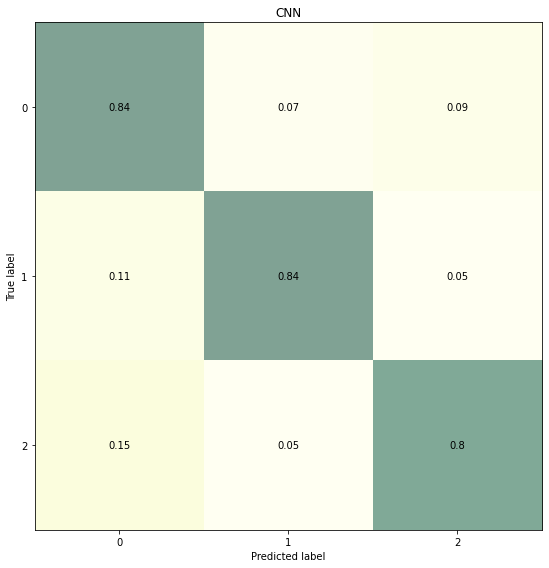

In [16]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(np.argmax(y_test, axis =1),np.argmax(model.predict(x_test), axis=1),  normalize = 'true')


#Better visualization of confusion matrices
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))
ax1.matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
for i in range(3):
    for j in range(3):
        ax1.text(x=j, y=i, s=round(c_matrix[i, j],2), ha="center", va="center")
ax1.xaxis.set_ticks_position('bottom')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('CNN')
fig.tight_layout()
plt.show()

## Test Discrimination loss

In [35]:
As = np.linspace(50,500,10)
res = []
y_predicted_list = []
y_list = []
for A in As:
    str0 = f"ts_L60_Z12_A{A}_DX50_bias5_N10000"
    fnamex = "DATA/x_" + str0 + ".csv"
    fnamey = "DATA/y_" + str0 + ".csv"

    x = np.asarray(pd.read_csv(fnamex, header = None))

    x_std =  scaler.fit_transform(x.T).T

    categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
    
    y = to_categorical(categ)

    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2)
    x_train = x_train.reshape(x_train.shape[0],L,1)
    x_test = x_test.reshape(x_test.shape[0],L,1)
    
    model.load_weights("Original_Weights_CNN1.h5")
    
    hist = model.fit(x_train, y_train, batch_size = 250, epochs = 150, 
                 validation_data = (x_test, y_test), 
                verbose = 2, shuffle = True)
    res.append(pd.DataFrame(hist.history).iloc[:,-1])
    y_list.append(np.argmax(y_test, axis = 1))
    y_predicted_list.append(np.argmax(model.predict(x_test), axis = 1))

Epoch 1/150
32/32 - 0s - loss: 1.1004 - accuracy: 0.3347 - val_loss: 1.0995 - val_accuracy: 0.3435
Epoch 2/150
32/32 - 0s - loss: 1.0998 - accuracy: 0.3309 - val_loss: 1.0990 - val_accuracy: 0.3395
Epoch 3/150
32/32 - 0s - loss: 1.0993 - accuracy: 0.3326 - val_loss: 1.0990 - val_accuracy: 0.3490
Epoch 4/150
32/32 - 0s - loss: 1.0993 - accuracy: 0.3392 - val_loss: 1.0988 - val_accuracy: 0.3535
Epoch 5/150
32/32 - 0s - loss: 1.0986 - accuracy: 0.3425 - val_loss: 1.0989 - val_accuracy: 0.3455
Epoch 6/150
32/32 - 0s - loss: 1.0993 - accuracy: 0.3397 - val_loss: 1.0989 - val_accuracy: 0.3500
Epoch 7/150
32/32 - 0s - loss: 1.0990 - accuracy: 0.3347 - val_loss: 1.0989 - val_accuracy: 0.3440
Epoch 8/150
32/32 - 0s - loss: 1.0986 - accuracy: 0.3374 - val_loss: 1.0990 - val_accuracy: 0.3510
Epoch 9/150
32/32 - 0s - loss: 1.0988 - accuracy: 0.3376 - val_loss: 1.0989 - val_accuracy: 0.3495
Epoch 10/150
32/32 - 0s - loss: 1.0985 - accuracy: 0.3433 - val_loss: 1.0990 - val_accuracy: 0.3460
Epoch 11/

32/32 - 0s - loss: 1.0925 - accuracy: 0.3726 - val_loss: 1.1023 - val_accuracy: 0.3295
Epoch 84/150
32/32 - 0s - loss: 1.0920 - accuracy: 0.3688 - val_loss: 1.1017 - val_accuracy: 0.3310
Epoch 85/150
32/32 - 0s - loss: 1.0921 - accuracy: 0.3640 - val_loss: 1.1023 - val_accuracy: 0.3275
Epoch 86/150
32/32 - 0s - loss: 1.0911 - accuracy: 0.3714 - val_loss: 1.1030 - val_accuracy: 0.3280
Epoch 87/150
32/32 - 0s - loss: 1.0922 - accuracy: 0.3654 - val_loss: 1.1024 - val_accuracy: 0.3405
Epoch 88/150
32/32 - 0s - loss: 1.0917 - accuracy: 0.3664 - val_loss: 1.1027 - val_accuracy: 0.3270
Epoch 89/150
32/32 - 0s - loss: 1.0915 - accuracy: 0.3666 - val_loss: 1.1026 - val_accuracy: 0.3295
Epoch 90/150
32/32 - 0s - loss: 1.0916 - accuracy: 0.3690 - val_loss: 1.1023 - val_accuracy: 0.3300
Epoch 91/150
32/32 - 0s - loss: 1.0903 - accuracy: 0.3747 - val_loss: 1.1036 - val_accuracy: 0.3270
Epoch 92/150
32/32 - 0s - loss: 1.0903 - accuracy: 0.3746 - val_loss: 1.1036 - val_accuracy: 0.3270
Epoch 93/150


Epoch 15/150
32/32 - 0s - loss: 1.0972 - accuracy: 0.3584 - val_loss: 1.0989 - val_accuracy: 0.3395
Epoch 16/150
32/32 - 0s - loss: 1.0970 - accuracy: 0.3537 - val_loss: 1.0989 - val_accuracy: 0.3320
Epoch 17/150
32/32 - 0s - loss: 1.0971 - accuracy: 0.3525 - val_loss: 1.0990 - val_accuracy: 0.3360
Epoch 18/150
32/32 - 0s - loss: 1.0965 - accuracy: 0.3638 - val_loss: 1.0990 - val_accuracy: 0.3405
Epoch 19/150
32/32 - 0s - loss: 1.0962 - accuracy: 0.3610 - val_loss: 1.0992 - val_accuracy: 0.3300
Epoch 20/150
32/32 - 0s - loss: 1.0958 - accuracy: 0.3616 - val_loss: 1.0991 - val_accuracy: 0.3415
Epoch 21/150
32/32 - 0s - loss: 1.0958 - accuracy: 0.3582 - val_loss: 1.0989 - val_accuracy: 0.3370
Epoch 22/150
32/32 - 0s - loss: 1.0960 - accuracy: 0.3568 - val_loss: 1.0989 - val_accuracy: 0.3455
Epoch 23/150
32/32 - 0s - loss: 1.0962 - accuracy: 0.3591 - val_loss: 1.0989 - val_accuracy: 0.3480
Epoch 24/150
32/32 - 0s - loss: 1.0954 - accuracy: 0.3569 - val_loss: 1.0992 - val_accuracy: 0.3435


Epoch 97/150
32/32 - 0s - loss: 1.0804 - accuracy: 0.3931 - val_loss: 1.1085 - val_accuracy: 0.3485
Epoch 98/150
32/32 - 0s - loss: 1.0796 - accuracy: 0.3979 - val_loss: 1.1085 - val_accuracy: 0.3470
Epoch 99/150
32/32 - 0s - loss: 1.0798 - accuracy: 0.3970 - val_loss: 1.1066 - val_accuracy: 0.3470
Epoch 100/150
32/32 - 0s - loss: 1.0790 - accuracy: 0.3971 - val_loss: 1.1080 - val_accuracy: 0.3360
Epoch 101/150
32/32 - 0s - loss: 1.0779 - accuracy: 0.4044 - val_loss: 1.1098 - val_accuracy: 0.3430
Epoch 102/150
32/32 - 0s - loss: 1.0776 - accuracy: 0.4027 - val_loss: 1.1088 - val_accuracy: 0.3470
Epoch 103/150
32/32 - 0s - loss: 1.0798 - accuracy: 0.3943 - val_loss: 1.1082 - val_accuracy: 0.3515
Epoch 104/150
32/32 - 0s - loss: 1.0786 - accuracy: 0.4001 - val_loss: 1.1085 - val_accuracy: 0.3405
Epoch 105/150
32/32 - 0s - loss: 1.0795 - accuracy: 0.3974 - val_loss: 1.1090 - val_accuracy: 0.3405
Epoch 106/150
32/32 - 0s - loss: 1.0775 - accuracy: 0.4002 - val_loss: 1.1098 - val_accuracy: 

Epoch 29/150
32/32 - 0s - loss: 1.0949 - accuracy: 0.3615 - val_loss: 1.0992 - val_accuracy: 0.3295
Epoch 30/150
32/32 - 0s - loss: 1.0948 - accuracy: 0.3632 - val_loss: 1.0993 - val_accuracy: 0.3345
Epoch 31/150
32/32 - 0s - loss: 1.0943 - accuracy: 0.3680 - val_loss: 1.0990 - val_accuracy: 0.3335
Epoch 32/150
32/32 - 0s - loss: 1.0944 - accuracy: 0.3670 - val_loss: 1.0990 - val_accuracy: 0.3310
Epoch 33/150
32/32 - 0s - loss: 1.0933 - accuracy: 0.3699 - val_loss: 1.0998 - val_accuracy: 0.3235
Epoch 34/150
32/32 - 0s - loss: 1.0935 - accuracy: 0.3691 - val_loss: 1.0992 - val_accuracy: 0.3280
Epoch 35/150
32/32 - 0s - loss: 1.0942 - accuracy: 0.3613 - val_loss: 1.0986 - val_accuracy: 0.3335
Epoch 36/150
32/32 - 0s - loss: 1.0928 - accuracy: 0.3747 - val_loss: 1.0994 - val_accuracy: 0.3270
Epoch 37/150
32/32 - 0s - loss: 1.0933 - accuracy: 0.3705 - val_loss: 1.0989 - val_accuracy: 0.3290
Epoch 38/150
32/32 - 0s - loss: 1.0928 - accuracy: 0.3669 - val_loss: 1.0989 - val_accuracy: 0.3275


Epoch 111/150
32/32 - 0s - loss: 1.0697 - accuracy: 0.4216 - val_loss: 1.1026 - val_accuracy: 0.3715
Epoch 112/150
32/32 - 0s - loss: 1.0699 - accuracy: 0.4150 - val_loss: 1.1028 - val_accuracy: 0.3620
Epoch 113/150
32/32 - 0s - loss: 1.0703 - accuracy: 0.4218 - val_loss: 1.1014 - val_accuracy: 0.3635
Epoch 114/150
32/32 - 0s - loss: 1.0709 - accuracy: 0.4193 - val_loss: 1.1028 - val_accuracy: 0.3610
Epoch 115/150
32/32 - 0s - loss: 1.0692 - accuracy: 0.4176 - val_loss: 1.1023 - val_accuracy: 0.3650
Epoch 116/150
32/32 - 0s - loss: 1.0684 - accuracy: 0.4230 - val_loss: 1.1034 - val_accuracy: 0.3635
Epoch 117/150
32/32 - 0s - loss: 1.0690 - accuracy: 0.4175 - val_loss: 1.1034 - val_accuracy: 0.3655
Epoch 118/150
32/32 - 0s - loss: 1.0693 - accuracy: 0.4207 - val_loss: 1.1038 - val_accuracy: 0.3630
Epoch 119/150
32/32 - 0s - loss: 1.0684 - accuracy: 0.4161 - val_loss: 1.1036 - val_accuracy: 0.3645
Epoch 120/150
32/32 - 0s - loss: 1.0700 - accuracy: 0.4168 - val_loss: 1.1035 - val_accurac

Epoch 43/150
32/32 - 0s - loss: 1.0784 - accuracy: 0.4040 - val_loss: 1.0838 - val_accuracy: 0.3865
Epoch 44/150
32/32 - 0s - loss: 1.0771 - accuracy: 0.4079 - val_loss: 1.0815 - val_accuracy: 0.4020
Epoch 45/150
32/32 - 0s - loss: 1.0796 - accuracy: 0.4024 - val_loss: 1.0832 - val_accuracy: 0.3925
Epoch 46/150
32/32 - 0s - loss: 1.0770 - accuracy: 0.4062 - val_loss: 1.0821 - val_accuracy: 0.3900
Epoch 47/150
32/32 - 0s - loss: 1.0732 - accuracy: 0.4168 - val_loss: 1.0809 - val_accuracy: 0.3980
Epoch 48/150
32/32 - 0s - loss: 1.0737 - accuracy: 0.4165 - val_loss: 1.0801 - val_accuracy: 0.3965
Epoch 49/150
32/32 - 0s - loss: 1.0729 - accuracy: 0.4125 - val_loss: 1.0785 - val_accuracy: 0.4055
Epoch 50/150
32/32 - 0s - loss: 1.0743 - accuracy: 0.4104 - val_loss: 1.0783 - val_accuracy: 0.4035
Epoch 51/150
32/32 - 0s - loss: 1.0717 - accuracy: 0.4161 - val_loss: 1.0798 - val_accuracy: 0.4040
Epoch 52/150
32/32 - 0s - loss: 1.0713 - accuracy: 0.4146 - val_loss: 1.0775 - val_accuracy: 0.4045


Epoch 125/150
32/32 - 0s - loss: 1.0332 - accuracy: 0.4697 - val_loss: 1.0632 - val_accuracy: 0.4315
Epoch 126/150
32/32 - 0s - loss: 1.0329 - accuracy: 0.4688 - val_loss: 1.0680 - val_accuracy: 0.4220
Epoch 127/150
32/32 - 0s - loss: 1.0328 - accuracy: 0.4695 - val_loss: 1.0653 - val_accuracy: 0.4235
Epoch 128/150
32/32 - 0s - loss: 1.0295 - accuracy: 0.4706 - val_loss: 1.0690 - val_accuracy: 0.4210
Epoch 129/150
32/32 - 0s - loss: 1.0321 - accuracy: 0.4681 - val_loss: 1.0596 - val_accuracy: 0.4385
Epoch 130/150
32/32 - 0s - loss: 1.0324 - accuracy: 0.4638 - val_loss: 1.0663 - val_accuracy: 0.4275
Epoch 131/150
32/32 - 0s - loss: 1.0310 - accuracy: 0.4723 - val_loss: 1.0617 - val_accuracy: 0.4380
Epoch 132/150
32/32 - 0s - loss: 1.0328 - accuracy: 0.4690 - val_loss: 1.0632 - val_accuracy: 0.4340
Epoch 133/150
32/32 - 0s - loss: 1.0282 - accuracy: 0.4753 - val_loss: 1.0627 - val_accuracy: 0.4335
Epoch 134/150
32/32 - 0s - loss: 1.0310 - accuracy: 0.4697 - val_loss: 1.0613 - val_accurac

Epoch 57/150
32/32 - 0s - loss: 1.0461 - accuracy: 0.4594 - val_loss: 1.0545 - val_accuracy: 0.4525
Epoch 58/150
32/32 - 0s - loss: 1.0456 - accuracy: 0.4556 - val_loss: 1.0546 - val_accuracy: 0.4525
Epoch 59/150
32/32 - 0s - loss: 1.0450 - accuracy: 0.4589 - val_loss: 1.0537 - val_accuracy: 0.4540
Epoch 60/150
32/32 - 0s - loss: 1.0416 - accuracy: 0.4641 - val_loss: 1.0521 - val_accuracy: 0.4580
Epoch 61/150
32/32 - 0s - loss: 1.0398 - accuracy: 0.4645 - val_loss: 1.0514 - val_accuracy: 0.4535
Epoch 62/150
32/32 - 0s - loss: 1.0395 - accuracy: 0.4611 - val_loss: 1.0511 - val_accuracy: 0.4485
Epoch 63/150
32/32 - 0s - loss: 1.0353 - accuracy: 0.4701 - val_loss: 1.0498 - val_accuracy: 0.4585
Epoch 64/150
32/32 - 0s - loss: 1.0394 - accuracy: 0.4644 - val_loss: 1.0499 - val_accuracy: 0.4550
Epoch 65/150
32/32 - 0s - loss: 1.0414 - accuracy: 0.4638 - val_loss: 1.0488 - val_accuracy: 0.4565
Epoch 66/150
32/32 - 0s - loss: 1.0363 - accuracy: 0.4711 - val_loss: 1.0498 - val_accuracy: 0.4560


Epoch 139/150
32/32 - 0s - loss: 0.9871 - accuracy: 0.5255 - val_loss: 1.0217 - val_accuracy: 0.4920
Epoch 140/150
32/32 - 0s - loss: 0.9885 - accuracy: 0.5176 - val_loss: 1.0200 - val_accuracy: 0.5055
Epoch 141/150
32/32 - 0s - loss: 0.9891 - accuracy: 0.5144 - val_loss: 1.0205 - val_accuracy: 0.4985
Epoch 142/150
32/32 - 0s - loss: 0.9842 - accuracy: 0.5178 - val_loss: 1.0210 - val_accuracy: 0.4990
Epoch 143/150
32/32 - 0s - loss: 0.9882 - accuracy: 0.5182 - val_loss: 1.0204 - val_accuracy: 0.5000
Epoch 144/150
32/32 - 0s - loss: 0.9895 - accuracy: 0.5129 - val_loss: 1.0206 - val_accuracy: 0.5020
Epoch 145/150
32/32 - 0s - loss: 0.9836 - accuracy: 0.5199 - val_loss: 1.0199 - val_accuracy: 0.5000
Epoch 146/150
32/32 - 0s - loss: 0.9874 - accuracy: 0.5156 - val_loss: 1.0210 - val_accuracy: 0.4990
Epoch 147/150
32/32 - 0s - loss: 0.9872 - accuracy: 0.5229 - val_loss: 1.0190 - val_accuracy: 0.5010
Epoch 148/150
32/32 - 0s - loss: 0.9864 - accuracy: 0.5109 - val_loss: 1.0199 - val_accurac

Epoch 71/150
32/32 - 0s - loss: 0.9449 - accuracy: 0.5545 - val_loss: 0.9818 - val_accuracy: 0.5265
Epoch 72/150
32/32 - 0s - loss: 0.9441 - accuracy: 0.5508 - val_loss: 0.9734 - val_accuracy: 0.5405
Epoch 73/150
32/32 - 0s - loss: 0.9492 - accuracy: 0.5505 - val_loss: 0.9714 - val_accuracy: 0.5340
Epoch 74/150
32/32 - 0s - loss: 0.9394 - accuracy: 0.5590 - val_loss: 0.9713 - val_accuracy: 0.5300
Epoch 75/150
32/32 - 0s - loss: 0.9348 - accuracy: 0.5555 - val_loss: 0.9692 - val_accuracy: 0.5350
Epoch 76/150
32/32 - 0s - loss: 0.9356 - accuracy: 0.5616 - val_loss: 0.9664 - val_accuracy: 0.5395
Epoch 77/150
32/32 - 0s - loss: 0.9359 - accuracy: 0.5602 - val_loss: 0.9694 - val_accuracy: 0.5280
Epoch 78/150
32/32 - 0s - loss: 0.9352 - accuracy: 0.5649 - val_loss: 0.9649 - val_accuracy: 0.5365
Epoch 79/150
32/32 - 0s - loss: 0.9320 - accuracy: 0.5633 - val_loss: 0.9627 - val_accuracy: 0.5425
Epoch 80/150
32/32 - 0s - loss: 0.9326 - accuracy: 0.5620 - val_loss: 0.9581 - val_accuracy: 0.5450


Epoch 3/150
32/32 - 0s - loss: 1.0989 - accuracy: 0.3571 - val_loss: 1.0993 - val_accuracy: 0.3465
Epoch 4/150
32/32 - 0s - loss: 1.0976 - accuracy: 0.3587 - val_loss: 1.0982 - val_accuracy: 0.3555
Epoch 5/150
32/32 - 0s - loss: 1.0959 - accuracy: 0.3740 - val_loss: 1.0971 - val_accuracy: 0.3665
Epoch 6/150
32/32 - 0s - loss: 1.0948 - accuracy: 0.3775 - val_loss: 1.0958 - val_accuracy: 0.3710
Epoch 7/150
32/32 - 0s - loss: 1.0937 - accuracy: 0.3808 - val_loss: 1.0942 - val_accuracy: 0.3780
Epoch 8/150
32/32 - 0s - loss: 1.0926 - accuracy: 0.3829 - val_loss: 1.0923 - val_accuracy: 0.3890
Epoch 9/150
32/32 - 0s - loss: 1.0891 - accuracy: 0.3898 - val_loss: 1.0904 - val_accuracy: 0.3925
Epoch 10/150
32/32 - 0s - loss: 1.0875 - accuracy: 0.3952 - val_loss: 1.0874 - val_accuracy: 0.4030
Epoch 11/150
32/32 - 0s - loss: 1.0858 - accuracy: 0.3924 - val_loss: 1.0848 - val_accuracy: 0.4080
Epoch 12/150
32/32 - 0s - loss: 1.0825 - accuracy: 0.4074 - val_loss: 1.0817 - val_accuracy: 0.4100
Epoch 1

Epoch 85/150
32/32 - 0s - loss: 0.8979 - accuracy: 0.5810 - val_loss: 0.9052 - val_accuracy: 0.5765
Epoch 86/150
32/32 - 0s - loss: 0.8921 - accuracy: 0.5906 - val_loss: 0.9065 - val_accuracy: 0.5810
Epoch 87/150
32/32 - 0s - loss: 0.8959 - accuracy: 0.5856 - val_loss: 0.9031 - val_accuracy: 0.5840
Epoch 88/150
32/32 - 0s - loss: 0.8987 - accuracy: 0.5815 - val_loss: 0.9039 - val_accuracy: 0.5830
Epoch 89/150
32/32 - 0s - loss: 0.8969 - accuracy: 0.5882 - val_loss: 0.9029 - val_accuracy: 0.5785
Epoch 90/150
32/32 - 0s - loss: 0.8959 - accuracy: 0.5864 - val_loss: 0.9039 - val_accuracy: 0.5845
Epoch 91/150
32/32 - 0s - loss: 0.8917 - accuracy: 0.5845 - val_loss: 0.9024 - val_accuracy: 0.5785
Epoch 92/150
32/32 - 0s - loss: 0.8935 - accuracy: 0.5879 - val_loss: 0.9061 - val_accuracy: 0.5845
Epoch 93/150
32/32 - 0s - loss: 0.8953 - accuracy: 0.5857 - val_loss: 0.9049 - val_accuracy: 0.5800
Epoch 94/150
32/32 - 0s - loss: 0.8883 - accuracy: 0.5840 - val_loss: 0.8996 - val_accuracy: 0.5880


Epoch 17/150
32/32 - 0s - loss: 1.0574 - accuracy: 0.4338 - val_loss: 1.0504 - val_accuracy: 0.4300
Epoch 18/150
32/32 - 0s - loss: 1.0526 - accuracy: 0.4311 - val_loss: 1.0442 - val_accuracy: 0.4385
Epoch 19/150
32/32 - 0s - loss: 1.0458 - accuracy: 0.4449 - val_loss: 1.0370 - val_accuracy: 0.4435
Epoch 20/150
32/32 - 0s - loss: 1.0430 - accuracy: 0.4412 - val_loss: 1.0293 - val_accuracy: 0.4540
Epoch 21/150
32/32 - 0s - loss: 1.0329 - accuracy: 0.4564 - val_loss: 1.0216 - val_accuracy: 0.4640
Epoch 22/150
32/32 - 0s - loss: 1.0258 - accuracy: 0.4572 - val_loss: 1.0151 - val_accuracy: 0.4745
Epoch 23/150
32/32 - 0s - loss: 1.0159 - accuracy: 0.4669 - val_loss: 1.0067 - val_accuracy: 0.4770
Epoch 24/150
32/32 - 0s - loss: 1.0118 - accuracy: 0.4799 - val_loss: 0.9993 - val_accuracy: 0.4805
Epoch 25/150
32/32 - 0s - loss: 1.0042 - accuracy: 0.4819 - val_loss: 0.9917 - val_accuracy: 0.4820
Epoch 26/150
32/32 - 0s - loss: 0.9973 - accuracy: 0.4794 - val_loss: 0.9850 - val_accuracy: 0.4975


Epoch 99/150
32/32 - 0s - loss: 0.7087 - accuracy: 0.7113 - val_loss: 0.7438 - val_accuracy: 0.6825
Epoch 100/150
32/32 - 0s - loss: 0.7056 - accuracy: 0.7106 - val_loss: 0.7431 - val_accuracy: 0.6775
Epoch 101/150
32/32 - 0s - loss: 0.7049 - accuracy: 0.7097 - val_loss: 0.7421 - val_accuracy: 0.6865
Epoch 102/150
32/32 - 0s - loss: 0.7005 - accuracy: 0.7072 - val_loss: 0.7418 - val_accuracy: 0.6935
Epoch 103/150
32/32 - 0s - loss: 0.6975 - accuracy: 0.7150 - val_loss: 0.7368 - val_accuracy: 0.6915
Epoch 104/150
32/32 - 0s - loss: 0.6986 - accuracy: 0.7106 - val_loss: 0.7344 - val_accuracy: 0.6900
Epoch 105/150
32/32 - 0s - loss: 0.6991 - accuracy: 0.7126 - val_loss: 0.7423 - val_accuracy: 0.6940
Epoch 106/150
32/32 - 0s - loss: 0.6971 - accuracy: 0.7131 - val_loss: 0.7389 - val_accuracy: 0.6860
Epoch 107/150
32/32 - 0s - loss: 0.6885 - accuracy: 0.7141 - val_loss: 0.7321 - val_accuracy: 0.6915
Epoch 108/150
32/32 - 0s - loss: 0.6928 - accuracy: 0.7139 - val_loss: 0.7333 - val_accuracy

Epoch 31/150
32/32 - 0s - loss: 0.8858 - accuracy: 0.5855 - val_loss: 0.8629 - val_accuracy: 0.6005
Epoch 32/150
32/32 - 0s - loss: 0.8780 - accuracy: 0.5913 - val_loss: 0.8511 - val_accuracy: 0.6235
Epoch 33/150
32/32 - 0s - loss: 0.8717 - accuracy: 0.5941 - val_loss: 0.8430 - val_accuracy: 0.6235
Epoch 34/150
32/32 - 0s - loss: 0.8623 - accuracy: 0.6022 - val_loss: 0.8367 - val_accuracy: 0.6315
Epoch 35/150
32/32 - 0s - loss: 0.8533 - accuracy: 0.6093 - val_loss: 0.8270 - val_accuracy: 0.6360
Epoch 36/150
32/32 - 0s - loss: 0.8481 - accuracy: 0.6053 - val_loss: 0.8203 - val_accuracy: 0.6415
Epoch 37/150
32/32 - 0s - loss: 0.8419 - accuracy: 0.6185 - val_loss: 0.8159 - val_accuracy: 0.6430
Epoch 38/150
32/32 - 0s - loss: 0.8410 - accuracy: 0.6162 - val_loss: 0.8098 - val_accuracy: 0.6495
Epoch 39/150
32/32 - 0s - loss: 0.8367 - accuracy: 0.6248 - val_loss: 0.8044 - val_accuracy: 0.6495
Epoch 40/150
32/32 - 0s - loss: 0.8268 - accuracy: 0.6274 - val_loss: 0.7991 - val_accuracy: 0.6545


Epoch 113/150
32/32 - 0s - loss: 0.5883 - accuracy: 0.7720 - val_loss: 0.5777 - val_accuracy: 0.7760
Epoch 114/150
32/32 - 0s - loss: 0.5859 - accuracy: 0.7715 - val_loss: 0.5760 - val_accuracy: 0.7745
Epoch 115/150
32/32 - 0s - loss: 0.5848 - accuracy: 0.7731 - val_loss: 0.5768 - val_accuracy: 0.7650
Epoch 116/150
32/32 - 0s - loss: 0.5896 - accuracy: 0.7725 - val_loss: 0.5759 - val_accuracy: 0.7715
Epoch 117/150
32/32 - 0s - loss: 0.5793 - accuracy: 0.7759 - val_loss: 0.5716 - val_accuracy: 0.7685
Epoch 118/150
32/32 - 0s - loss: 0.5790 - accuracy: 0.7740 - val_loss: 0.5751 - val_accuracy: 0.7715
Epoch 119/150
32/32 - 0s - loss: 0.5816 - accuracy: 0.7729 - val_loss: 0.5729 - val_accuracy: 0.7765
Epoch 120/150
32/32 - 0s - loss: 0.5782 - accuracy: 0.7775 - val_loss: 0.5715 - val_accuracy: 0.7740
Epoch 121/150
32/32 - 0s - loss: 0.5777 - accuracy: 0.7745 - val_loss: 0.5712 - val_accuracy: 0.7775
Epoch 122/150
32/32 - 0s - loss: 0.5776 - accuracy: 0.7771 - val_loss: 0.5683 - val_accurac

Epoch 45/150
32/32 - 0s - loss: 0.7329 - accuracy: 0.6810 - val_loss: 0.6613 - val_accuracy: 0.7435
Epoch 46/150
32/32 - 0s - loss: 0.7176 - accuracy: 0.6956 - val_loss: 0.6495 - val_accuracy: 0.7460
Epoch 47/150
32/32 - 0s - loss: 0.7156 - accuracy: 0.6941 - val_loss: 0.6487 - val_accuracy: 0.7500
Epoch 48/150
32/32 - 0s - loss: 0.7094 - accuracy: 0.6921 - val_loss: 0.6404 - val_accuracy: 0.7500
Epoch 49/150
32/32 - 0s - loss: 0.6968 - accuracy: 0.6982 - val_loss: 0.6357 - val_accuracy: 0.7520
Epoch 50/150
32/32 - 0s - loss: 0.6980 - accuracy: 0.7028 - val_loss: 0.6276 - val_accuracy: 0.7580
Epoch 51/150
32/32 - 0s - loss: 0.6875 - accuracy: 0.7105 - val_loss: 0.6236 - val_accuracy: 0.7560
Epoch 52/150
32/32 - 0s - loss: 0.6815 - accuracy: 0.7154 - val_loss: 0.6167 - val_accuracy: 0.7630
Epoch 53/150
32/32 - 0s - loss: 0.6679 - accuracy: 0.7258 - val_loss: 0.6065 - val_accuracy: 0.7685
Epoch 54/150
32/32 - 0s - loss: 0.6632 - accuracy: 0.7268 - val_loss: 0.6024 - val_accuracy: 0.7655


Epoch 127/150
32/32 - 0s - loss: 0.4646 - accuracy: 0.8265 - val_loss: 0.4517 - val_accuracy: 0.8330
Epoch 128/150
32/32 - 0s - loss: 0.4728 - accuracy: 0.8244 - val_loss: 0.4510 - val_accuracy: 0.8335
Epoch 129/150
32/32 - 0s - loss: 0.4637 - accuracy: 0.8273 - val_loss: 0.4540 - val_accuracy: 0.8410
Epoch 130/150
32/32 - 0s - loss: 0.4690 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.8430
Epoch 131/150
32/32 - 0s - loss: 0.4712 - accuracy: 0.8261 - val_loss: 0.4479 - val_accuracy: 0.8400
Epoch 132/150
32/32 - 0s - loss: 0.4654 - accuracy: 0.8254 - val_loss: 0.4484 - val_accuracy: 0.8420
Epoch 133/150
32/32 - 0s - loss: 0.4574 - accuracy: 0.8290 - val_loss: 0.4492 - val_accuracy: 0.8395
Epoch 134/150
32/32 - 0s - loss: 0.4628 - accuracy: 0.8289 - val_loss: 0.4471 - val_accuracy: 0.8410
Epoch 135/150
32/32 - 0s - loss: 0.4599 - accuracy: 0.8284 - val_loss: 0.4493 - val_accuracy: 0.8420
Epoch 136/150
32/32 - 0s - loss: 0.4571 - accuracy: 0.8301 - val_loss: 0.4465 - val_accurac

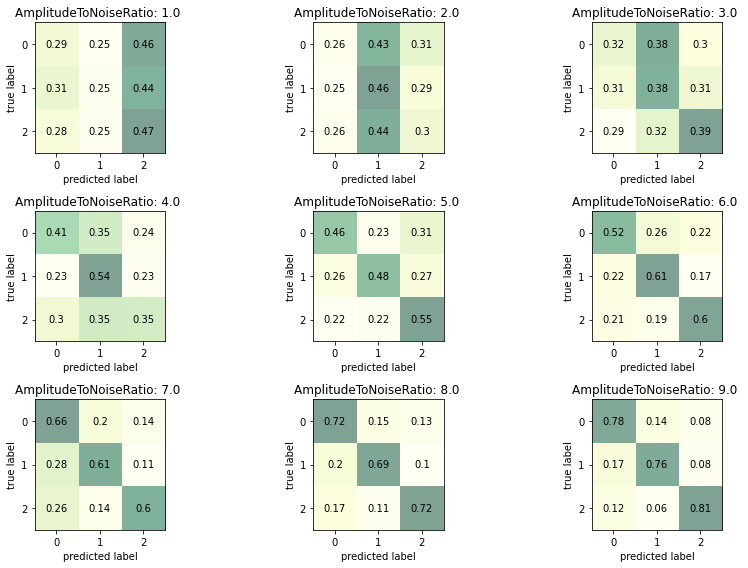

In [36]:
#Better visualization of confusion matrices
fig, ax1 = plt.subplots(nrows=3, ncols=3, figsize = (15, 8))

for i in range(3):
    for j in range(3):
        c_matrix = confusion_matrix(y_list[3*i+j],y_predicted_list[3*i+j],  normalize = 'true')
        ax1[i,j].matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
        ax1[i,j].set_xticks(np.arange(3))
        ax1[i,j].set_yticks(np.arange(3))
        for l in range(3):
            for m in range(3):
                ax1[i,j].text(x=l, y=m, s=round(c_matrix[m, l],2), ha="center", va="center")
        ax1[i,j].xaxis.set_ticks_position('bottom')
        ax1[i,j].set_xlabel('predicted label')
        ax1[i,j].set_ylabel('true label')
        ax1[i,j].set_title(f"AmplitudeToNoiseRatio: {As[3*i+j]/50} ")
        fig.tight_layout()
plt.show()

In [37]:
np.savetxt("DATA/Results_Discrimination_new.csv",np.asarray(res))
np.savetxt("DATA/Results_YPredicted.csv_new",np.asarray(y_predicted_list))

# 3

Now we consider three different networks, using a single convolution layer, as suggested. Performances will be in general slightly worse with respect to the network trained with two convoultional layers.

# Data

In [59]:
x = np.loadtxt("DATA/x_ts_comp_N10000.csv", delimiter =",")
categ_y = np.loadtxt("DATA/y_ts_comp_N10000.csv", delimiter =",")

scaler = StandardScaler()
x =  scaler.fit_transform(x.T).T


In [60]:
y = to_categorical(categ_y)

In [61]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3

In [62]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

## First Model. Conv(4 filters, kernel_size = 10); AvgPool; 2x Dense(10)

In [41]:
np.random.seed(12345)

model = compile_model( fil = [4], k_size = [10], PoolSize = 5, dense = [10,10], learn_rate = 0.001, dout_rate = 0.2)

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 51, 4)             44        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 4)             0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)               

In [38]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 15ms/step - loss: 1.1010 - accuracy: 0.3275 - val_loss: 1.0946 - val_accuracy: 0.3665
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0934 - accuracy: 0.3735 - val_loss: 1.0895 - val_accuracy: 0.3935
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0888 - accuracy: 0.3833 - val_loss: 1.0800 - val_accuracy: 0.4215
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0804 - accuracy: 0.3943 - val_loss: 1.0629 - val_accuracy: 0.4610
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0602 - accuracy: 0.4230 - val_loss: 1.0398 - val_accuracy: 0.4925
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0357 - accuracy: 0.4582 - val_loss: 1.0086 - val_accuracy: 0.5035
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0106 - accuracy: 0.4596 - val_loss: 0.9791 - val_accuracy: 0.5265
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.7804 - val_loss: 0.5304 - val_accuracy: 0.7820
Epoch 60/250
32/32 [==============================] - 0s 6ms/step - loss: 0.5522 - accuracy: 0.7799 - val_loss: 0.5273 - val_accuracy: 0.7870
Epoch 61/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5561 - accuracy: 0.7821 - val_loss: 0.5271 - val_accuracy: 0.7885
Epoch 62/250
32/32 [==============================] - 0s 11ms/step - loss: 0.5624 - accuracy: 0.7776 - val_loss: 0.5275 - val_accuracy: 0.7890
Epoch 63/250
32/32 [==============================] - 0s 10ms/step - loss: 0.5566 - accuracy: 0.7869 - val_loss: 0.5275 - val_accuracy: 0.7870
Epoch 64/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5666 - accuracy: 0.7796 - val_loss: 0.5246 - val_accuracy: 0.7955
Epoch 65/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5574 - accuracy: 0.7847 - val_loss: 0.5259 - val_accuracy: 0.7885
Epoc

32/32 [==============================] - 0s 7ms/step - loss: 0.5252 - accuracy: 0.7989 - val_loss: 0.5068 - val_accuracy: 0.8005
Epoch 117/250
32/32 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.8103 - val_loss: 0.5104 - val_accuracy: 0.8005
Epoch 118/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5231 - accuracy: 0.7972 - val_loss: 0.5132 - val_accuracy: 0.7980
Epoch 119/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5087 - accuracy: 0.8115 - val_loss: 0.5038 - val_accuracy: 0.8010
Epoch 120/250
32/32 [==============================] - 0s 6ms/step - loss: 0.5185 - accuracy: 0.7988 - val_loss: 0.5062 - val_accuracy: 0.7975
Epoch 121/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5267 - accuracy: 0.7935 - val_loss: 0.5051 - val_accuracy: 0.8055
Epoch 122/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5353 - accuracy: 0.7925 - val_loss: 0.5074 - val_accuracy: 0.7995
Epoch 123/250

32/32 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.8153 - val_loss: 0.5049 - val_accuracy: 0.8070
Epoch 174/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5032 - accuracy: 0.8043 - val_loss: 0.5017 - val_accuracy: 0.8045
Epoch 175/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.8098 - val_loss: 0.5038 - val_accuracy: 0.8015
Epoch 176/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4989 - accuracy: 0.8105 - val_loss: 0.5004 - val_accuracy: 0.8050
Epoch 177/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4968 - accuracy: 0.8107 - val_loss: 0.5015 - val_accuracy: 0.8020
Epoch 178/250
32/32 [==============================] - 0s 10ms/step - loss: 0.4983 - accuracy: 0.8139 - val_loss: 0.5002 - val_accuracy: 0.8055
Epoch 179/250
32/32 [==============================] - 0s 9ms/step - loss: 0.4864 - accuracy: 0.8186 - val_loss: 0.5001 - val_accuracy: 0.8020
Epoch 180/25

32/32 [==============================] - 0s 7ms/step - loss: 0.4783 - accuracy: 0.8181 - val_loss: 0.5008 - val_accuracy: 0.8035
Epoch 231/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.8173 - val_loss: 0.4975 - val_accuracy: 0.8055
Epoch 232/250
32/32 [==============================] - ETA: 0s - loss: 0.4943 - accuracy: 0.81 - 0s 9ms/step - loss: 0.4933 - accuracy: 0.8182 - val_loss: 0.5018 - val_accuracy: 0.8080
Epoch 233/250
32/32 [==============================] - 0s 8ms/step - loss: 0.4790 - accuracy: 0.8219 - val_loss: 0.4996 - val_accuracy: 0.8065
Epoch 234/250
32/32 [==============================] - 0s 7ms/step - loss: 0.4870 - accuracy: 0.8160 - val_loss: 0.4990 - val_accuracy: 0.8070
Epoch 235/250
32/32 [==============================] - 0s 9ms/step - loss: 0.4819 - accuracy: 0.8156 - val_loss: 0.5011 - val_accuracy: 0.8050
Epoch 236/250
32/32 [==============================] - 0s 8ms/step - loss: 0.4790 - accuracy: 0.8185 - val_loss: 0

## $2^{nd}$ Model. Conv(3 filters, kernel_size = 5); AvgPool; Dense(12); Dropout(0.2); Nesterov

In [43]:
np.random.seed(12345)

model = compile_model( fil = [3], k_size = [5], PoolSize = 5, dense = [12], learn_rate = 0.001, dout_rate = 0.2)
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 56, 3)             18        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 11, 3)             0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 33)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 12)                408       
_________________________________________________________________
dropout_20 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 39        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_______________________________________________________

In [44]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 14ms/step - loss: 1.0977 - accuracy: 0.3479 - val_loss: 1.0892 - val_accuracy: 0.3965
Epoch 2/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0870 - accuracy: 0.3962 - val_loss: 1.0729 - val_accuracy: 0.4430
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0712 - accuracy: 0.4189 - val_loss: 1.0484 - val_accuracy: 0.4790
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0497 - accuracy: 0.4521 - val_loss: 1.0206 - val_accuracy: 0.5100
Epoch 5/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0303 - accuracy: 0.4741 - val_loss: 0.9967 - val_accuracy: 0.5215
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0095 - accuracy: 0.4869 - val_loss: 0.9770 - val_accuracy: 0.5385
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.9913 - accuracy: 0.5094 - val_loss: 0.9567 - val_accuracy: 0.5595
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8127 - accuracy: 0.6303 - val_loss: 0.7726 - val_accuracy: 0.6665
Epoch 60/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8172 - accuracy: 0.6259 - val_loss: 0.7727 - val_accuracy: 0.6635
Epoch 61/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7945 - accuracy: 0.6345 - val_loss: 0.7754 - val_accuracy: 0.6570
Epoch 62/250
32/32 [==============================] - 0s 8ms/step - loss: 0.8138 - accuracy: 0.6248 - val_loss: 0.7693 - val_accuracy: 0.6655
Epoch 63/250
32/32 [==============================] - 0s 7ms/step - loss: 0.8019 - accuracy: 0.6292 - val_loss: 0.7722 - val_accuracy: 0.6630
Epoch 64/250
32/32 [==============================] - 0s 7ms/step - loss: 0.8008 - accuracy: 0.6338 - val_loss: 0.7700 - val_accuracy: 0.6720
Epoch 65/250
32/32 [==============================] - 0s 7ms/step - loss: 0.8074 - accuracy: 0.6231 - val_loss: 0.7701 - val_accuracy: 0.6665
Epoch 

32/32 [==============================] - 0s 8ms/step - loss: 0.7753 - accuracy: 0.6534 - val_loss: 0.7479 - val_accuracy: 0.6790
Epoch 117/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7582 - accuracy: 0.6611 - val_loss: 0.7448 - val_accuracy: 0.6755
Epoch 118/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7694 - accuracy: 0.6528 - val_loss: 0.7438 - val_accuracy: 0.6755
Epoch 119/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7695 - accuracy: 0.6580 - val_loss: 0.7420 - val_accuracy: 0.6780
Epoch 120/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7711 - accuracy: 0.6458 - val_loss: 0.7419 - val_accuracy: 0.6755
Epoch 121/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7686 - accuracy: 0.6497 - val_loss: 0.7419 - val_accuracy: 0.6800
Epoch 122/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7634 - accuracy: 0.6582 - val_loss: 0.7433 - val_accuracy: 0.6730
Epoch 123/250

32/32 [==============================] - 0s 7ms/step - loss: 0.7473 - accuracy: 0.6772 - val_loss: 0.7262 - val_accuracy: 0.6800
Epoch 174/250
32/32 [==============================] - 0s 6ms/step - loss: 0.7356 - accuracy: 0.6717 - val_loss: 0.7246 - val_accuracy: 0.6885
Epoch 175/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7458 - accuracy: 0.6687 - val_loss: 0.7235 - val_accuracy: 0.6865
Epoch 176/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7406 - accuracy: 0.6717 - val_loss: 0.7283 - val_accuracy: 0.6825
Epoch 177/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7502 - accuracy: 0.6739 - val_loss: 0.7225 - val_accuracy: 0.6865
Epoch 178/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7528 - accuracy: 0.6691 - val_loss: 0.7294 - val_accuracy: 0.6835
Epoch 179/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7538 - accuracy: 0.6623 - val_loss: 0.7209 - val_accuracy: 0.6870
Epoch 180/250

32/32 [==============================] - 0s 7ms/step - loss: 0.7227 - accuracy: 0.6873 - val_loss: 0.7058 - val_accuracy: 0.6945
Epoch 231/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7362 - accuracy: 0.6778 - val_loss: 0.7048 - val_accuracy: 0.6935
Epoch 232/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7234 - accuracy: 0.6816 - val_loss: 0.7115 - val_accuracy: 0.6940
Epoch 233/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7240 - accuracy: 0.6832 - val_loss: 0.7050 - val_accuracy: 0.6960
Epoch 234/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7169 - accuracy: 0.6927 - val_loss: 0.7050 - val_accuracy: 0.6975
Epoch 235/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7297 - accuracy: 0.6885 - val_loss: 0.7019 - val_accuracy: 0.6965
Epoch 236/250
32/32 [==============================] - 0s 7ms/step - loss: 0.7268 - accuracy: 0.6892 - val_loss: 0.7019 - val_accuracy: 0.6985
Epoch 237/250

## $3^{rd}$ Model: Conv(13 filters, kernel_size 23), AvgPool
Not expected to work best.. and so it does

In [46]:
reg = regularizers.l2(0.001)
np.random.seed(12345)

ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = compile_model( fil = [13], k_size = [23], PoolSize = 5, dense = [3], learn_rate = 0.001, dout_rate = 0.2)
print(model.summary())


model = Sequential()
model.add(Conv1D(filters=13, kernel_size = 23,
                kernel_regularizer = reg,
                kernel_initializer=ini,
                activation = "relu",
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(3))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="sigmoid"))

print(model.summary())

opt = keras.optimizers.SGD(lr=0.1, momentum= 0.9, nesterov=True, decay = 1e-6)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 38, 13)            312       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 7, 13)             0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 91)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 276       
_________________________________________________________________
dropout_23 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 12        
Total params: 600
Trainable params: 600
Non-trainable params: 0
_______________________________________________________

In [33]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 12ms/step - loss: 1.0972 - accuracy: 0.3638 - val_loss: 1.0828 - val_accuracy: 0.4005
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0806 - accuracy: 0.4018 - val_loss: 1.0705 - val_accuracy: 0.4325
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0677 - accuracy: 0.4248 - val_loss: 1.0585 - val_accuracy: 0.4330
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0533 - accuracy: 0.4418 - val_loss: 1.0449 - val_accuracy: 0.4655
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0461 - accuracy: 0.4616 - val_loss: 1.0305 - val_accuracy: 0.4835
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 1.0326 - accuracy: 0.4761 - val_loss: 1.0174 - val_accuracy: 0.4880
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 1.0268 - accuracy: 0.4793 - val_loss: 1.0080 - val_accuracy: 0.5130
Epoch 8/250


32/32 [==============================] - 0s 8ms/step - loss: 0.6472 - accuracy: 0.7354 - val_loss: 0.5895 - val_accuracy: 0.7815
Epoch 59/250
32/32 [==============================] - 0s 8ms/step - loss: 0.6343 - accuracy: 0.7418 - val_loss: 0.5880 - val_accuracy: 0.7850
Epoch 60/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6243 - accuracy: 0.7499 - val_loss: 0.5954 - val_accuracy: 0.7820
Epoch 61/250
32/32 [==============================] - 0s 10ms/step - loss: 0.6455 - accuracy: 0.7391 - val_loss: 0.5849 - val_accuracy: 0.7835
Epoch 62/250
32/32 [==============================] - 1s 16ms/step - loss: 0.6293 - accuracy: 0.7489 - val_loss: 0.5935 - val_accuracy: 0.7765
Epoch 63/250
32/32 [==============================] - 1s 16ms/step - loss: 0.6418 - accuracy: 0.7433 - val_loss: 0.5814 - val_accuracy: 0.7855
Epoch 64/250
32/32 [==============================] - 0s 11ms/step - loss: 0.6415 - accuracy: 0.7468 - val_loss: 0.5801 - val_accuracy: 0.7905
Epoch 65/250
32

32/32 [==============================] - 0s 9ms/step - loss: 0.5378 - accuracy: 0.7967 - val_loss: 0.5106 - val_accuracy: 0.8185
Epoch 116/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5581 - accuracy: 0.7787 - val_loss: 0.5079 - val_accuracy: 0.8235
Epoch 117/250
32/32 [==============================] - 0s 11ms/step - loss: 0.5402 - accuracy: 0.7936 - val_loss: 0.5102 - val_accuracy: 0.8210
Epoch 118/250
32/32 [==============================] - 0s 9ms/step - loss: 0.5474 - accuracy: 0.7843 - val_loss: 0.5220 - val_accuracy: 0.8025
Epoch 119/250
32/32 [==============================] - 0s 14ms/step - loss: 0.5556 - accuracy: 0.7899 - val_loss: 0.5233 - val_accuracy: 0.8065
Epoch 120/250
32/32 [==============================] - 0s 11ms/step - loss: 0.5764 - accuracy: 0.7764 - val_loss: 0.5135 - val_accuracy: 0.8180
Epoch 121/250
32/32 [==============================] - 0s 12ms/step - loss: 0.5376 - accuracy: 0.7974 - val_loss: 0.5087 - val_accuracy: 0.8210
Epoch 122

32/32 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.7993 - val_loss: 0.4912 - val_accuracy: 0.8250
Epoch 173/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5274 - accuracy: 0.7996 - val_loss: 0.4815 - val_accuracy: 0.8290
Epoch 174/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5254 - accuracy: 0.8036 - val_loss: 0.4823 - val_accuracy: 0.8310
Epoch 175/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5385 - accuracy: 0.8061 - val_loss: 0.4815 - val_accuracy: 0.8325
Epoch 176/250
32/32 [==============================] - 0s 7ms/step - loss: 0.5273 - accuracy: 0.8024 - val_loss: 0.4822 - val_accuracy: 0.8280
Epoch 177/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.8027 - val_loss: 0.4806 - val_accuracy: 0.8310
Epoch 178/250
32/32 [==============================] - 0s 10ms/step - loss: 0.5145 - accuracy: 0.8074 - val_loss: 0.4807 - val_accuracy: 0.8310
Epoch 179/25

32/32 [==============================] - 0s 10ms/step - loss: 0.5344 - accuracy: 0.7990 - val_loss: 0.4704 - val_accuracy: 0.8365
Epoch 230/250
32/32 [==============================] - 0s 9ms/step - loss: 0.5005 - accuracy: 0.8132 - val_loss: 0.4702 - val_accuracy: 0.8370
Epoch 231/250
32/32 [==============================] - 0s 10ms/step - loss: 0.5207 - accuracy: 0.8089 - val_loss: 0.4745 - val_accuracy: 0.8325
Epoch 232/250
32/32 [==============================] - 0s 9ms/step - loss: 0.5181 - accuracy: 0.7991 - val_loss: 0.4689 - val_accuracy: 0.8350
Epoch 233/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5174 - accuracy: 0.7979 - val_loss: 0.4707 - val_accuracy: 0.8275
Epoch 234/250
32/32 [==============================] - 0s 11ms/step - loss: 0.5068 - accuracy: 0.8079 - val_loss: 0.4715 - val_accuracy: 0.8405
Epoch 235/250
32/32 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.8087 - val_loss: 0.4689 - val_accuracy: 0.8355
Epoch 236/

The best result is achieved by the combination of a strong Convolutional neural network and one dense layer. We can also appreciate how the number of parameters increases a lot with the number of filters, while the kernel size has a minimum effect. In practice if we change the kernel size or the number of nodes in the dense layer we obtain approximately the same result.

# Regularization

We use the same model we used in lessons to evaluate how regulations values change the results

In [4]:
df_GridSearch = pd.read_csv("DATA/Regularization_results.csv", index_col = False)
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score", ascending = False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l,param_reg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,11.743135,0.396809,0.144392,0.006275,0.1000,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
2,15.555042,4.664063,0.180385,0.043716,0.1000,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.1, 'reg': <function l1_l2 at 0x7fa2bbc...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
3,15.651340,4.081976,0.188800,0.040384,0.0100,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6730,0.5395,0.6810,0.5525,0.611500,0.065722,10
10,15.346722,4.184644,0.158263,0.033479,0.0001,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.0001, 'reg': <class 'tensorflow.python...",0.5415,0.7125,0.7245,0.7145,0.673250,0.076202,9
5,14.771484,4.224691,0.172961,0.031725,0.0100,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.01, 'reg': <function l1_l2 at 0x7fa2bb...",0.7050,0.5505,0.7255,0.7180,0.674750,0.072110,8
1,11.804894,0.155126,0.144236,0.008223,0.1000,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.7130,0.6915,0.6825,0.7225,0.702375,0.016056,7
6,16.286934,3.832132,0.168695,0.035507,0.0010,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.001, 'reg': <class 'tensorflow.python....",0.6950,0.6920,0.7335,0.6980,0.704625,0.016805,6
11,16.200689,4.584406,0.182908,0.044824,0.0001,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.0001, 'reg': <function l1_l2 at 0x7fa2...",0.6950,0.7170,0.7315,0.6980,0.710375,0.014830,5
8,14.526269,4.302998,0.192493,0.048365,0.0010,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.001, 'reg': <function l1_l2 at 0x7fa2b...",0.6930,0.7165,0.6945,0.7445,0.712125,0.020879,4
4,12.064559,1.456055,0.162866,0.031747,0.0100,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6880,0.7120,0.7180,0.7320,0.712500,0.015898,3


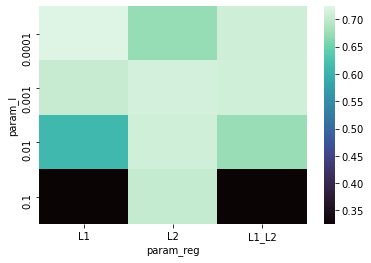

In [6]:
pr = df_GridSearch.pivot(index = "param_l", columns = "param_reg", values = "mean_test_score")
g = sns.heatmap(pr, cmap="mako")
g.set(xticklabels=["L1", "L2", "L1_L2"])
plt.xticks(rotation=0)
plt.show()

Best fits are achieved by regularizers with small parameters: L1 and L1_L2 perform best with a parameter = 0.0001. Also L2 allows brings similar results with an higher parameter (0.001). Definitely using a too strong regularization (L1 with 0.1 for example) gives poor results.

In [19]:
batch_size = 250
epochs = 250

model1 = compile_model( regularizers.l2,  0.1)
model2 = compile_model( regularizers.l2,  0.001)

model1.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)
model2.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

TypeError: 'float' object is not callable

NameError: name 'model1' is not defined

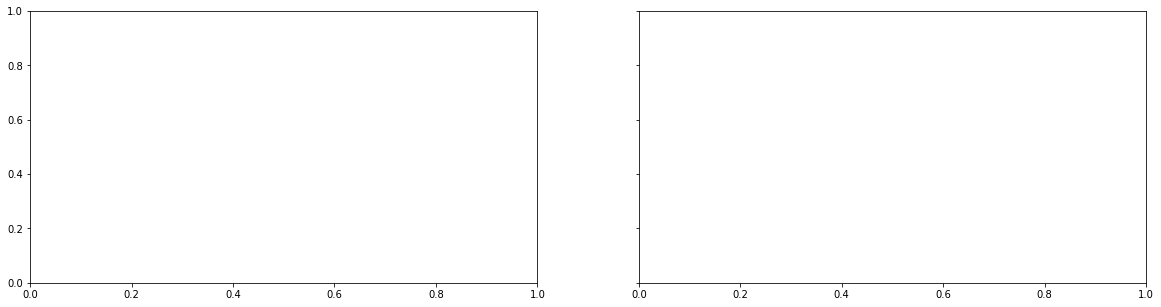

In [18]:
fig, axes = plt.subplots(1,2,figsize=(20,5), sharey=True)
colors = ["#D81B60", "#1E88E5", "#FFC107", "#004D40"]

filters, biases = model1.layers[0].get_weights()
axes[0].imgshow(filters, color = colors[i],label = "{}° filter".format(i+1), lw =2.5)
axes[0].legend()
axes[0].set_title("Strong regularization")

filters, biases = model2.layers[0].get_weights()
axes[1].imgshow(filters, color = colors[i], label = f"{i+1}° filter", lw =2.5)
axes[1].legend()
axes[1].set_title("Weak regularization")

plt.show()

In [79]:
results1 = model1.evaluate(x_test, y_test, verbose = 0)
results2 = model2.evaluate(x_test, y_test, verbose = 0)

print(f"Validation loss for strong regularization is {results1[1]:1.2}, while for weak regularization is {results2[1]:1.2}")

Validation loss for strong regularization is 0.71, while for weak regularization is 0.72


One can easily see how strong regularization give weights of almost zero value, while pattern recognition is not visible. Results are also similar in both cases.

## Bias Regularization

In [57]:
from keras import initializers, regularizers
reg = regularizers.l2(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters = 8, kernel_size = 11,
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 activation = 'relu',
                 input_shape = input_shape 
                ))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = 'softmax'))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model.compile(loss =keras.losses.categorical_crossentropy, 
             optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 50, 8)             96        
_________________________________________________________________
average_pooling1d_11 (Averag (None, 10, 8)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 4, 5)              285       
_________________________________________________________________
flatten_12 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

In [63]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 0s 8ms/step - loss: 0.9952 - accuracy: 0.5408 - val_loss: 0.7590 - val_accuracy: 0.5615
Epoch 2/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7601 - accuracy: 0.5809 - val_loss: 0.7197 - val_accuracy: 0.6030
Epoch 3/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7410 - accuracy: 0.5934 - val_loss: 0.7038 - val_accuracy: 0.6190
Epoch 4/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7340 - accuracy: 0.5966 - val_loss: 0.6966 - val_accuracy: 0.6230
Epoch 5/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7270 - accuracy: 0.6051 - val_loss: 0.6910 - val_accuracy: 0.6310
Epoch 6/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7244 - accuracy: 0.6055 - val_loss: 0.6872 - val_accuracy: 0.6380
Epoch 7/250
32/32 [==============================] - 0s 8ms/step - loss: 0.7188 - accuracy: 0.6152 - val_loss: 0.6874 - val_accuracy: 0.6360
Epoch 8/250
3

Epoch 59/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6933 - val_loss: 0.6074 - val_accuracy: 0.7285
Epoch 60/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6938 - val_loss: 0.6033 - val_accuracy: 0.7310
Epoch 61/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.7003 - val_loss: 0.6180 - val_accuracy: 0.7250
Epoch 62/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.6945 - val_loss: 0.6027 - val_accuracy: 0.7300
Epoch 63/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.7064 - val_loss: 0.6059 - val_accuracy: 0.7315
Epoch 64/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7009 - val_loss: 0.6051 - val_accuracy: 0.7290
Epoch 65/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.7032 - val_loss: 0.6058 - val_accuracy: 0.7285
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7819 - val_loss: 0.5144 - val_accuracy: 0.7835
Epoch 174/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5213 - accuracy: 0.7859 - val_loss: 0.5201 - val_accuracy: 0.7835
Epoch 175/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7874 - val_loss: 0.5168 - val_accuracy: 0.7865
Epoch 176/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7841 - val_loss: 0.5253 - val_accuracy: 0.7820
Epoch 177/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7819 - val_loss: 0.5150 - val_accuracy: 0.7855
Epoch 178/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7786 - val_loss: 0.5139 - val_accuracy: 0.7855
Epoch 179/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7803 - val_loss: 0.5185 - val_accuracy: 0.7815
Epoch 180/250

In [65]:
from keras import initializers, regularizers
reg = regularizers.l2(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters = 8, kernel_size = 11,
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 bias_regularizer = reg,
                 bias_initializer = ini,
                 activation = 'relu',
                 input_shape = input_shape 
                ))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = 'softmax'))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model.compile(loss =keras.losses.categorical_crossentropy, 
             optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 50, 8)             96        
_________________________________________________________________
average_pooling1d_12 (Averag (None, 10, 8)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 4, 5)              285       
_________________________________________________________________
flatten_13 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

In [66]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 17ms/step - loss: 1.1006 - accuracy: 0.3251 - val_loss: 1.0976 - val_accuracy: 0.3610
Epoch 2/250
32/32 [==============================] - 0s 8ms/step - loss: 1.0966 - accuracy: 0.3744 - val_loss: 1.0935 - val_accuracy: 0.4030
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0928 - accuracy: 0.3849 - val_loss: 1.0854 - val_accuracy: 0.4020
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0825 - accuracy: 0.3936 - val_loss: 1.0657 - val_accuracy: 0.4370
Epoch 5/250
32/32 [==============================] - 0s 8ms/step - loss: 1.0609 - accuracy: 0.4214 - val_loss: 1.0370 - val_accuracy: 0.4705
Epoch 6/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0330 - accuracy: 0.4454 - val_loss: 1.0068 - val_accuracy: 0.4865
Epoch 7/250
32/32 [==============================] - 0s 8ms/step - loss: 1.0127 - accuracy: 0.4614 - val_loss: 0.9846 - val_accuracy: 0.4855
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.6026 - val_loss: 0.7472 - val_accuracy: 0.6040
Epoch 60/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7350 - accuracy: 0.6064 - val_loss: 0.7488 - val_accuracy: 0.6035
Epoch 61/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7337 - accuracy: 0.6131 - val_loss: 0.7431 - val_accuracy: 0.6150
Epoch 62/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7348 - accuracy: 0.6108 - val_loss: 0.7390 - val_accuracy: 0.6090
Epoch 63/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7251 - accuracy: 0.6229 - val_loss: 0.7350 - val_accuracy: 0.6130
Epoch 64/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.6189 - val_loss: 0.7330 - val_accuracy: 0.6145
Epoch 65/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.6210 - val_loss: 0.7338 - val_accuracy: 0.6255
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7193 - val_loss: 0.6202 - val_accuracy: 0.7065
Epoch 174/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.7249 - val_loss: 0.6071 - val_accuracy: 0.7200
Epoch 175/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.7227 - val_loss: 0.6132 - val_accuracy: 0.7190
Epoch 176/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7181 - val_loss: 0.6053 - val_accuracy: 0.7230
Epoch 177/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.7239 - val_loss: 0.6053 - val_accuracy: 0.7265
Epoch 178/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.7228 - val_loss: 0.6063 - val_accuracy: 0.7220
Epoch 179/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.7213 - val_loss: 0.6039 - val_accuracy: 0.7200
Epoch 180/250

In [70]:
from keras import initializers, regularizers
reg = regularizers.l2(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters = 8, kernel_size = 11,
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 activity_regularizer = reg,
                 activation = 'relu',
                 input_shape = input_shape 
                ))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = 'softmax'))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model.compile(loss =keras.losses.categorical_crossentropy, 
             optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 50, 8)             96        
_________________________________________________________________
average_pooling1d_14 (Averag (None, 10, 8)             0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 4, 5)              285       
_________________________________________________________________
flatten_15 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 3)               

In [71]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True)

Epoch 1/250
32/32 [==============================] - 1s 16ms/step - loss: 1.1016 - accuracy: 0.3263 - val_loss: 1.0979 - val_accuracy: 0.3670
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0966 - accuracy: 0.3715 - val_loss: 1.0933 - val_accuracy: 0.3660
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0882 - accuracy: 0.3820 - val_loss: 1.0845 - val_accuracy: 0.4215
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0773 - accuracy: 0.4178 - val_loss: 1.0680 - val_accuracy: 0.4555
Epoch 5/250
32/32 [==============================] - 0s 7ms/step - loss: 1.0571 - accuracy: 0.4538 - val_loss: 1.0410 - val_accuracy: 0.4365
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 1.0292 - accuracy: 0.4638 - val_loss: 1.0015 - val_accuracy: 0.4920
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9883 - accuracy: 0.5024 - val_loss: 0.9523 - val_accuracy: 0.5195
Epoch 8/250


Epoch 59/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6934 - val_loss: 0.6102 - val_accuracy: 0.7310
Epoch 60/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.7094 - val_loss: 0.6053 - val_accuracy: 0.7250
Epoch 61/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.7162 - val_loss: 0.6067 - val_accuracy: 0.7265
Epoch 62/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.7211 - val_loss: 0.6084 - val_accuracy: 0.7200
Epoch 63/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6148 - accuracy: 0.7099 - val_loss: 0.6067 - val_accuracy: 0.7300
Epoch 64/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.7214 - val_loss: 0.6033 - val_accuracy: 0.7305
Epoch 65/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.7231 - val_loss: 0.6055 - val_accuracy: 0.7250
Epoch 

32/32 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7805 - val_loss: 0.5205 - val_accuracy: 0.7850
Epoch 174/250
32/32 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.7814 - val_loss: 0.5198 - val_accuracy: 0.7835
Epoch 175/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7827 - val_loss: 0.5151 - val_accuracy: 0.7880
Epoch 176/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7930 - val_loss: 0.5177 - val_accuracy: 0.7875
Epoch 177/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7878 - val_loss: 0.5147 - val_accuracy: 0.7895
Epoch 178/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7986 - val_loss: 0.5196 - val_accuracy: 0.7745
Epoch 179/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7850 - val_loss: 0.5124 - val_accuracy: 0.7900
Epoch 180/250

Bias regularization gives a worse result, while activity regularization final accuracy is similar to the simple weight regularization. 

## Exercise 2 Results

In [76]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter=',',
                   usecols= (0,1), unpack=True, dtype = str)

In [142]:
N = len(sy)
print(f"Number of total samples {N}")
Ls = len(sx[0])
print(f"Lenght of a sample {Ls}")

print(f"Sample: {sx[0]}, label: {sy[0]}")

perc_train = 0.7
N_train = int(N*perc_train)
N_test = N -N_train
print(f'\ndata:{N}\ntrain: {N_train}\ntest: {N_test}')

Number of total samples 3000
Lenght of a sample 16
Sample: AAGGTCTGCCGGCCGA, label: 1

data:3000
train: 2100
test: 900


In [143]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc = {Q[i]: i for i in range(Nc)}
print(f"One-hot encoding dictionary: {onehc}")

One-hot encoding dictionary: {'A': 0, 'C': 1, 'G': 2, 'T': 3}


## Data conversion: One-Hot Encoding

In [144]:
y = sy.astype(int)

L = Ls*Nc
print(f"Product of lenght ({Ls}) and character possibilities ({Nc}): {L}\n")

x= np.zeros((N,L))

for n in range(N):
    for i in range(Ls):
        x[n][i*4 + onehc[sx[n][i]]] = 1
print(f"Original sequence:\n {sx[0]}\n")
print(f"Encoded sequence:\n {x[0]}")

Product of lenght (16) and character possibilities (4): 64

Original sequence:
 AAGGTCTGCCGGCCGA

Encoded sequence:
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


## Split train/test - validation

In [145]:
(x_train, y_train) = (x[:N_train], y[:N_train])
(x_test, y_test) = (x[N_train:], y[N_train:])
print(f"Ratio between y_train labels sum and train samples: {y_train.sum() / N_train}")
print(f"Ratio between y_test  labels sum and test samples: {y_test.sum() / N_test}")


Ratio between y_train labels sum and train samples: 0.24714285714285714
Ratio between y_test  labels sum and test samples: 0.24444444444444444


# Model

In [160]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow as tf 

model = keras.Sequential([
    # Block One
    layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same',
                  input_shape=[16,4]),
    layers.MaxPool1D(),

    # Block Two
    layers.Conv1D(filters=64, kernel_size=6, activation='relu', padding='same'),
    layers.MaxPool1D(),

    # Head
    layers.Flatten(),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])



model.compile(optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [161]:
new_x_train = x_train.reshape(2100, 16,4)
new_x_test = x_test.reshape(900,16,4)

In [162]:
batch_size = 250
epochs = 250

fit = model.fit(new_x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (new_x_test, y_test), shuffle = True)

Epoch 1/250
9/9 [==============================] - 1s 43ms/step - loss: 0.7042 - accuracy: 0.5480 - val_loss: 0.6810 - val_accuracy: 0.7556
Epoch 2/250
9/9 [==============================] - 0s 16ms/step - loss: 0.6540 - accuracy: 0.7579 - val_loss: 0.5582 - val_accuracy: 0.7556
Epoch 3/250
9/9 [==============================] - 0s 14ms/step - loss: 0.5788 - accuracy: 0.7477 - val_loss: 0.5388 - val_accuracy: 0.7556
Epoch 4/250
9/9 [==============================] - 0s 13ms/step - loss: 0.5816 - accuracy: 0.7462 - val_loss: 0.5356 - val_accuracy: 0.7556
Epoch 5/250
9/9 [==============================] - 0s 15ms/step - loss: 0.5574 - accuracy: 0.7590 - val_loss: 0.5312 - val_accuracy: 0.7556
Epoch 6/250
9/9 [==============================] - 0s 18ms/step - loss: 0.5573 - accuracy: 0.7544 - val_loss: 0.5241 - val_accuracy: 0.7556
Epoch 7/250
9/9 [==============================] - 0s 14ms/step - loss: 0.5531 - accuracy: 0.7553 - val_loss: 0.5132 - val_accuracy: 0.7556
Epoch 8/250
9/9 [===

9/9 [==============================] - 0s 6ms/step - loss: 0.0698 - accuracy: 0.9926 - val_loss: 0.0690 - val_accuracy: 0.9744
Epoch 118/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0719 - accuracy: 0.9913 - val_loss: 0.0676 - val_accuracy: 0.9756
Epoch 119/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0697 - accuracy: 0.9906 - val_loss: 0.0762 - val_accuracy: 0.9700
Epoch 120/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0724 - accuracy: 0.9938 - val_loss: 0.1066 - val_accuracy: 0.9556
Epoch 121/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0744 - accuracy: 0.9891 - val_loss: 0.0684 - val_accuracy: 0.9767
Epoch 122/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0723 - accuracy: 0.9930 - val_loss: 0.0711 - val_accuracy: 0.9700
Epoch 123/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9920 - val_loss: 0.0680 - val_accuracy: 0.9778
Epoch 124/250
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9930 - val_loss: 0.0713 - val_accuracy: 0.9767
Epoch 234/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9904 - val_loss: 0.0834 - val_accuracy: 0.9689
Epoch 235/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0538 - accuracy: 0.9872 - val_loss: 0.0770 - val_accuracy: 0.9722
Epoch 236/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9884 - val_loss: 0.0697 - val_accuracy: 0.9756
Epoch 237/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0482 - accuracy: 0.9898 - val_loss: 0.0794 - val_accuracy: 0.9733
Epoch 238/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9880 - val_loss: 0.0701 - val_accuracy: 0.9756
Epoch 239/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0557 - accuracy: 0.9864 - val_loss: 0.0726 - val_accuracy: 0.9756
Epoch 240/250
9/9 [========

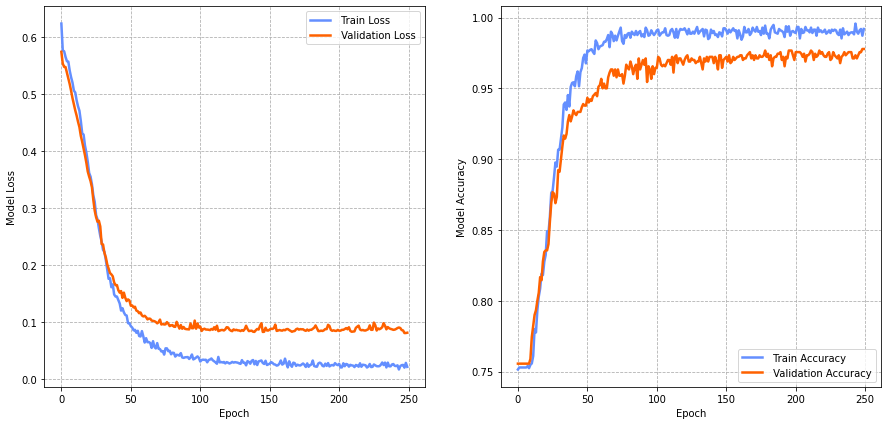

In [156]:
plot_res(fit)

The result is good, with a very high validation accuracy. 